In [1]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', font_scale=2, style='whitegrid')

### Historic NetConnect Germany imbalance prices in EUR per MWh

In [2]:
netconnect_data_raw = pd.read_xml('data/raw/NetConnect Germany imbalance prices.xml')
netconnect_data = netconnect_data_raw.loc[netconnect_data_raw['Gasday'].notna()].set_index('Gasday')[1:]
netconnect_data.index = pd.to_datetime(netconnect_data.index)
netconnect_data.index.name = 'Date'

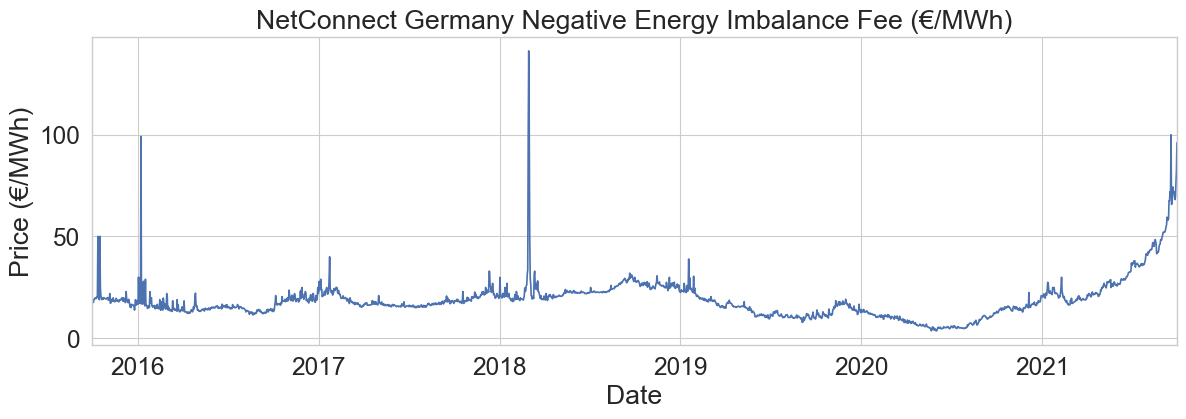

In [3]:
fig, ax = plt.subplots(figsize=(14, 4))
netconnect_data['NegativeEnergyImbalanceFee'].plot(ax=ax)

ax.set_title('NetConnect Germany Negative Energy Imbalance Fee (€/MWh)')
ax.set_ylabel('Price (€/MWh)')
ax.set_xlabel('Date')

# Save plot
fig.savefig("diagrams/data_overview_002_001.svg", format="svg", bbox_inches="tight")

### Historic GASPOOL imbalance prices

In [4]:
gaspool_data_raw = pd.read_csv(
    'data/raw/GASPOOL imbalance prices.csv',
    sep=';',
    index_col='Date')

gaspool_data = gaspool_data_raw[84:]
gaspool_data.index = pd.to_datetime(gaspool_data.index, format='%d.%m.%Y')

# Note that the column name is not correct, the price is actually in Euro/MWh
gaspool_data = gaspool_data['Price for pos. compensation energy [Eurocent/kWh]'].astype(float)

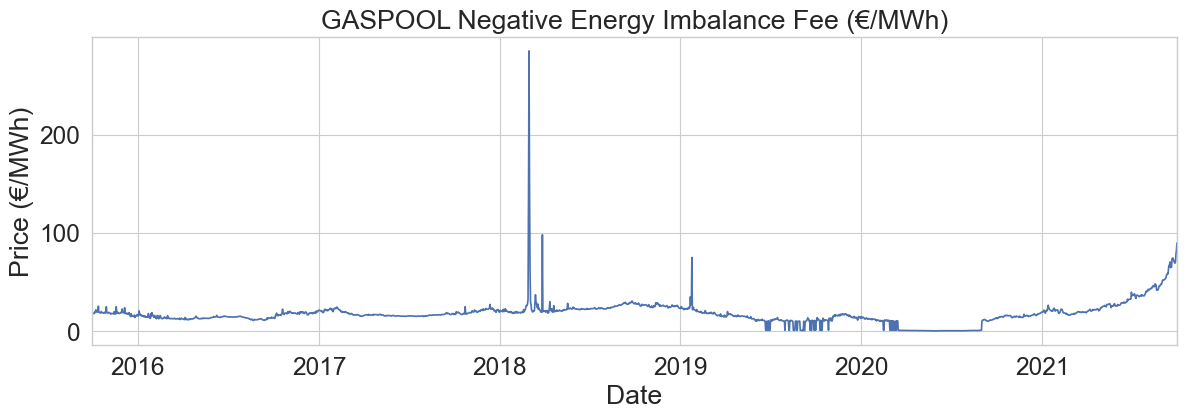

In [5]:
fig, ax = plt.subplots(figsize=(14, 4))
gaspool_data.plot(ax=ax)

ax.set_title('GASPOOL Negative Energy Imbalance Fee (€/MWh)')
ax.set_ylabel('Price (€/MWh)')
ax.set_xlabel('Date')


# Save plot
fig.savefig("diagrams/data_overview_002_002.svg", format="svg", bbox_inches="tight")

### Trading Hub Europe imbalance prices

In [6]:
the_data_raw = pd.read_csv(
    'data/raw/Trading Hub Europe imbalance prices.csv',
    sep=';',
    index_col='Gastag',
    decimal=','
)

the_data = the_data_raw
the_data.index.name = 'Date'
the_data.index = pd.to_datetime(the_data.index, format='%d.%m.%Y')

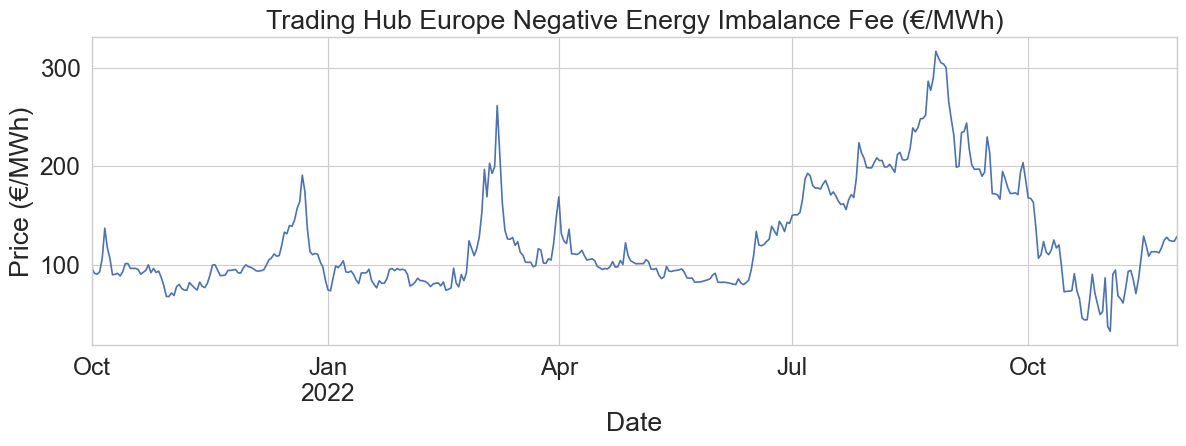

In [7]:
fig, ax = plt.subplots(figsize=(14, 4))
the_data['Positiver Ausgleichsenergiepreis (EUR/MWh)'].plot(ax=ax)

ax.set_title('Trading Hub Europe Negative Energy Imbalance Fee (€/MWh)')
ax.set_ylabel('Price (€/MWh)')
ax.set_xlabel('Date')


# Save plot
fig.savefig("diagrams/data_overview_002_003.svg", format="svg", bbox_inches="tight")